In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_set = pd.read_csv('../data/train.csv')

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
categorical_columns = ['MSZoning','Street','Alley','LandContour',
                    'LandSlope','Utilities','Neighborhood','Condition1',
                    'Condition2','HouseStyle','BldgType','OverallQual',
                    'OverallCond','RoofStyle','Exterior1st','Exterior2nd',
                    'ExterCond', 'BsmtCond','BsmtFinType1','CentralAir',
                    'Heating','KitchenQual','TotRmsAbvGrd', 'GarageType',
                    'GarageCond','PavedDrive','Fence','MiscFeature',
                    'SaleType','SaleCondition'
                    ]
## LandSlope y landcontour son parecidas
catorical_maybe = ['LotShape','LotConfig','MasVnrType']
years_columns = ['YearBuilt','YearRemodAdd','YrSold','MoSold']
numeric_columns = ['LotFrontage','LotArea','TotalBsmtSF','GrLivArea','Fireplaces',
                    'GarageCars','GarageArea','SalePrice']

In [18]:
train_set[categorical_columns[:15]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1460 non-null   object
 1   Street        1460 non-null   object
 2   Alley         91 non-null     object
 3   LandContour   1460 non-null   object
 4   LandSlope     1460 non-null   object
 5   Utilities     1460 non-null   object
 6   Neighborhood  1460 non-null   object
 7   Condition1    1460 non-null   object
 8   Condition2    1460 non-null   object
 9   HouseStyle    1460 non-null   object
 10  BldgType      1460 non-null   object
 11  OverallQual   1460 non-null   int64 
 12  OverallCond   1460 non-null   int64 
 13  RoofStyle     1460 non-null   object
 14  Exterior1st   1460 non-null   object
dtypes: int64(2), object(13)
memory usage: 171.2+ KB


In [19]:
train_set[categorical_columns[15:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Exterior2nd    1460 non-null   object
 1   ExterCond      1460 non-null   object
 2   BsmtCond       1423 non-null   object
 3   BsmtFinType1   1423 non-null   object
 4   CentralAir     1460 non-null   object
 5   Heating        1460 non-null   object
 6   KitchenQual    1460 non-null   object
 7   TotRmsAbvGrd   1460 non-null   int64 
 8   GarageType     1379 non-null   object
 9   GarageCond     1379 non-null   object
 10  PavedDrive     1460 non-null   object
 11  Fence          281 non-null    object
 12  MiscFeature    54 non-null     object
 13  SaleType       1460 non-null   object
 14  SaleCondition  1460 non-null   object
dtypes: int64(1), object(14)
memory usage: 171.2+ KB


In [20]:
train_set[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   LotArea      1460 non-null   int64  
 2   TotalBsmtSF  1460 non-null   int64  
 3   GrLivArea    1460 non-null   int64  
 4   Fireplaces   1460 non-null   int64  
 5   GarageCars   1460 non-null   int64  
 6   GarageArea   1460 non-null   int64  
 7   SalePrice    1460 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 91.4 KB


In [66]:
import pandas as pd

def create_info_dataframe(df):
    # Prepare lists to store info for each column
    columns = []
    non_null_counts = []
    dtypes = []

    for col in df.columns:
        columns.append(col)
        non_null_counts.append(df[col].notnull().sum())
        dtypes.append(df[col].dtype)

    # Create a DataFrame with the same columns as df.info()
    info_df = pd.DataFrame({
        'Column': columns,
        'Non-Null Count': non_null_counts,
        'Dtype': dtypes
    })

    return info_df


info_df = create_info_dataframe(train_set)
info_df


,Column,Non-Null Count,Dtype
0,Id,1460,int64
1,MSSubClass,1460,int64
2,MSZoning,1460,object
3,LotFrontage,1201,float64
4,LotArea,1460,int64
...,...,...,...
76,MoSold,1460,int64
77,YrSold,1460,int64
78,SaleType,1460,object
79,SaleCondition,1460,object


In [67]:
info_df.to_clipboard(index=False)

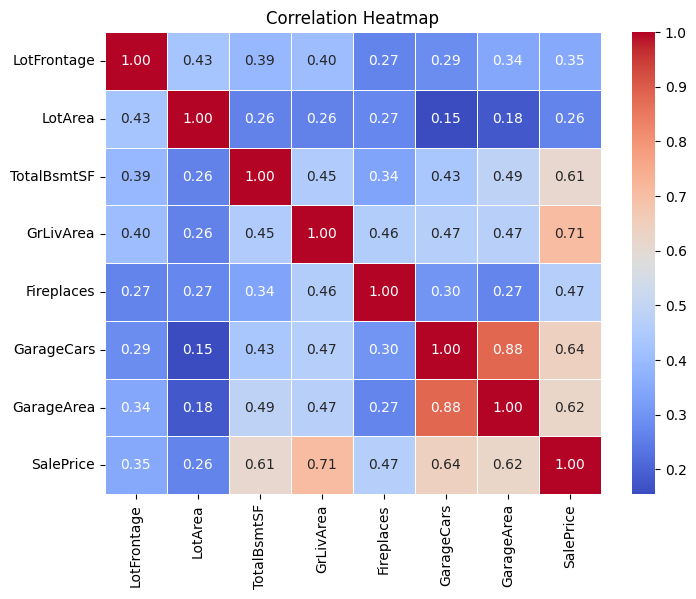

In [21]:
# Calculate the correlation matrix
corr_matrix = train_set[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [23]:
categorical_columns_filtered =  ['MSZoning','Street','LandContour',
                    'LandSlope','Utilities','Neighborhood','Condition1',
                    'Condition2','HouseStyle','BldgType','OverallQual',
                    'OverallCond','RoofStyle','Exterior1st','Exterior2nd',
                    'ExterCond', 'BsmtCond','BsmtFinType1','CentralAir',
                    'Heating','KitchenQual','TotRmsAbvGrd', 'GarageType',
                    'GarageCond','PavedDrive',
                    'SaleType','SaleCondition'
                    ]
## Alley,fence,miscfeature se elimina por alto numero de nan

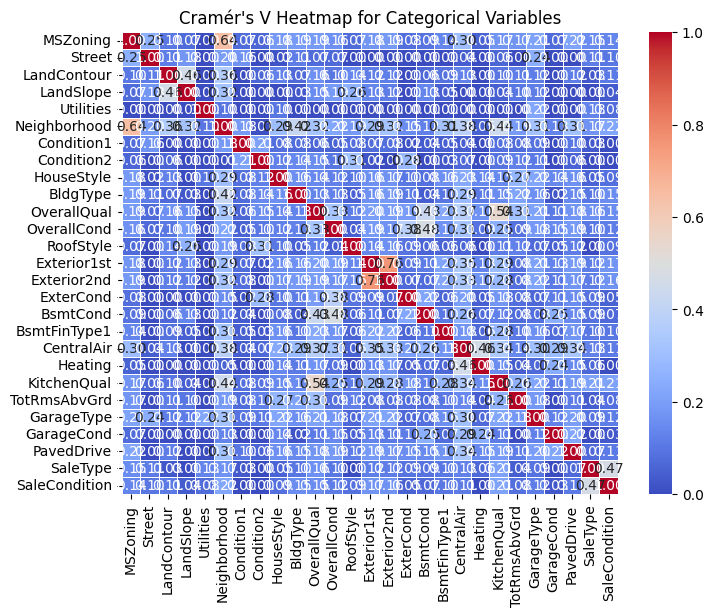

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to compute Cramér's V statistic for two categorical variables
def cramers_v(x, y):
    # Create a contingency table
    confusion_matrix = pd.crosstab(x, y)
    # Compute the chi-squared statistic
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()  # total sample size
    # Compute phi-squared statistic
    phi2 = chi2 / n
    # Number of rows and columns
    r, k = confusion_matrix.shape
    # Adjust phi2 for bias
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    # Compute and return Cramér's V
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example: Create a DataFrame with categorical variables


# List of columns (categorical variables)
cols = categorical_columns_filtered

# Create an empty DataFrame to store Cramér's V values
cramers_results = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)

# Compute Cramér's V for each pair of variables
for i in range(len(cols)):
    for j in range(i, len(cols)):
        if i == j:
            cramers_results.iloc[i, j] = 1.0  # perfect association with itself
        else:
            value = cramers_v(train_set[cols[i]], train_set[cols[j]])
            cramers_results.iloc[i, j] = value
            cramers_results.iloc[j, i] = value  # mirror the value

# Plot the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Cramér's V Heatmap for Categorical Variables")
plt.show()


In [59]:
selected_num_columns = ['LotFrontage','LotArea','TotalBsmtSF','GrLivArea','SalePrice']
##Se selecciona porque garage cars porque tiene mejor correlacion con saleprice y ambas estaban muy correlacionadas
categorical_columns_filtered =  ['Street','LandContour',
                    'LandSlope','Utilities','Neighborhood','Condition1',
                    'Condition2','HouseStyle','BldgType','OverallQual',
                    'OverallCond','RoofStyle','Exterior1st',
                    'ExterCond', 'BsmtCond','BsmtFinType1','CentralAir',
                    'Heating','KitchenQual','TotRmsAbvGrd', 'GarageType',
                    'GarageCond','PavedDrive',
                    'SaleType','SaleCondition','Fireplaces',
                    'GarageCars',
                    ]

## Neighborhood y MSZoning estan altamente correlacionados por lo que se dejara solo neighborhood
## Exterior1st y exterior2st estan altamente correlacionados por lo que tomaremos solo exterior1

In [42]:
import plotly.express as px

In [54]:
### Revision de gráficos


def draw_pie_chart(df,category):

    # Count the frequency of each category

    plt.style.use('seaborn-v0_8-colorblind')

    # Sample DataFrame with categorical data (replace with your actual data)


    # Compute the frequency of each category
    counts = df[category].value_counts()
    labels = counts.index.tolist()
    sizes = counts.values

    explode = [0.03] * len(sizes)
    max_index = np.argmax(sizes)  # index of the largest category
    explode[max_index] = 0.07     # give the largest category a bigger 'pop'

    # (Optional) If you want to hide labels for very small slices to avoid overlap:
    def autopct_func(pct):
        # Only show labels for slices >= 2%
        return ('%1.1f%%' % pct) if pct >= 2 else ''

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot the donut chart
    wedges, text_labels, autotexts = ax.pie(
        sizes,
        explode=explode,
        labels=labels,
        labeldistance=1.1,      # how far the category labels are from the center
        autopct=autopct_func,   # function to conditionally show or format percentages
        pctdistance=0.7,        # how far the percentage labels sit from the center
        startangle=150,         # rotate so large slices move away from top
        #colors=colors[:len(sizes)],
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )

    # Add a white circle in the center to create a donut effect
    centre_circle = plt.Circle((0, 0), 0.60, fc='white')
    ax.add_artist(centre_circle)

    # Style the text
    for t in text_labels:
        t.set_fontsize(11)
    for a in autotexts:
        a.set_color('black')
        a.set_fontsize(10)

    # Ensure the donut is a circle
    ax.axis('equal')

    # Title positioning: adjust 'y' if overlapping
    plt.title(f'{category} Distribution', fontsize=16, y=1.05)

    # Improve spacing around the chart
    plt.tight_layout()

    # Display the chart
    plt.show()


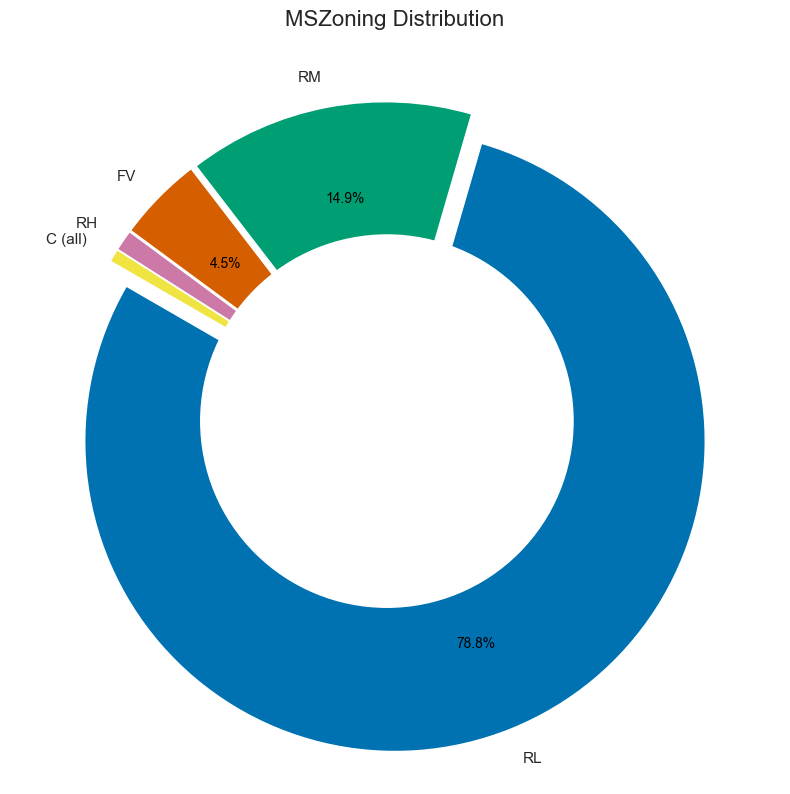

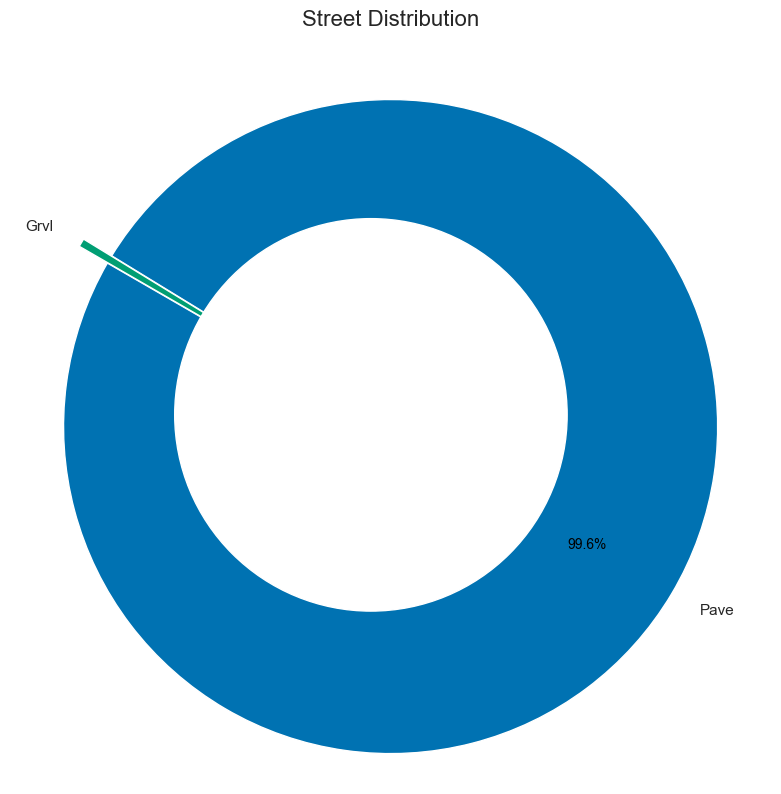

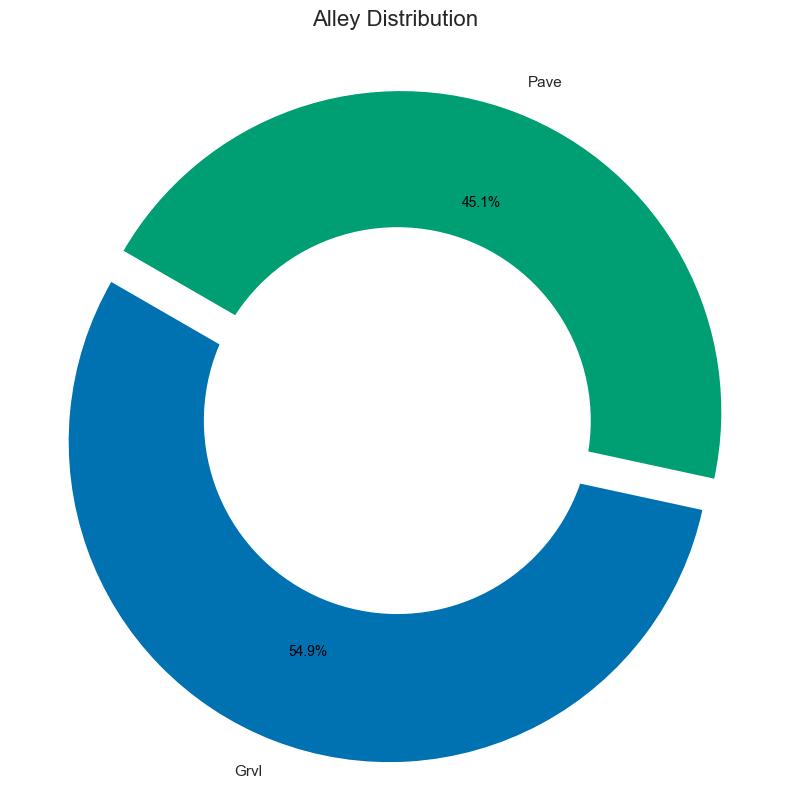

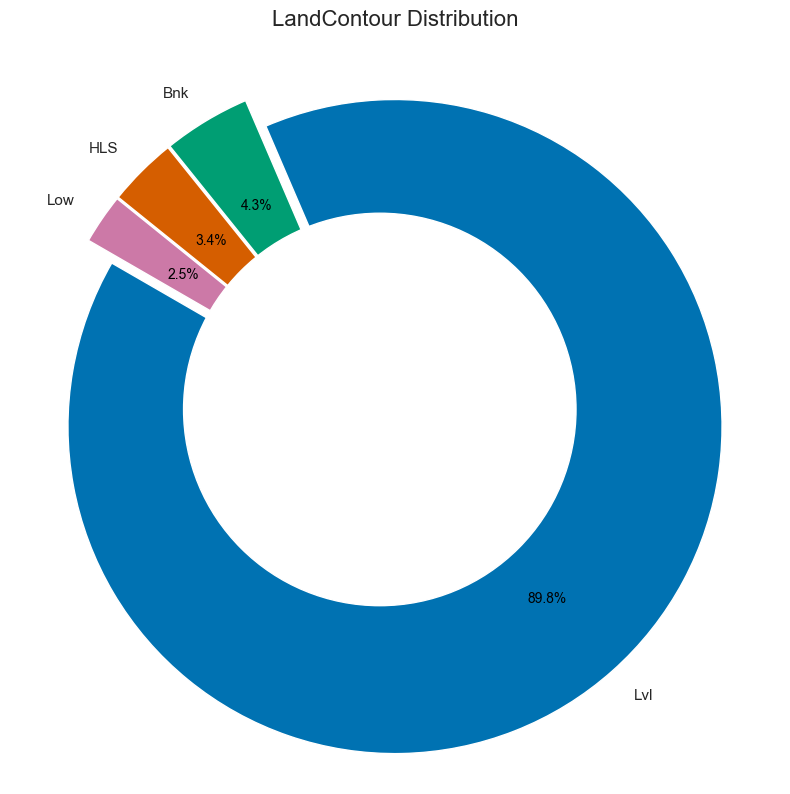

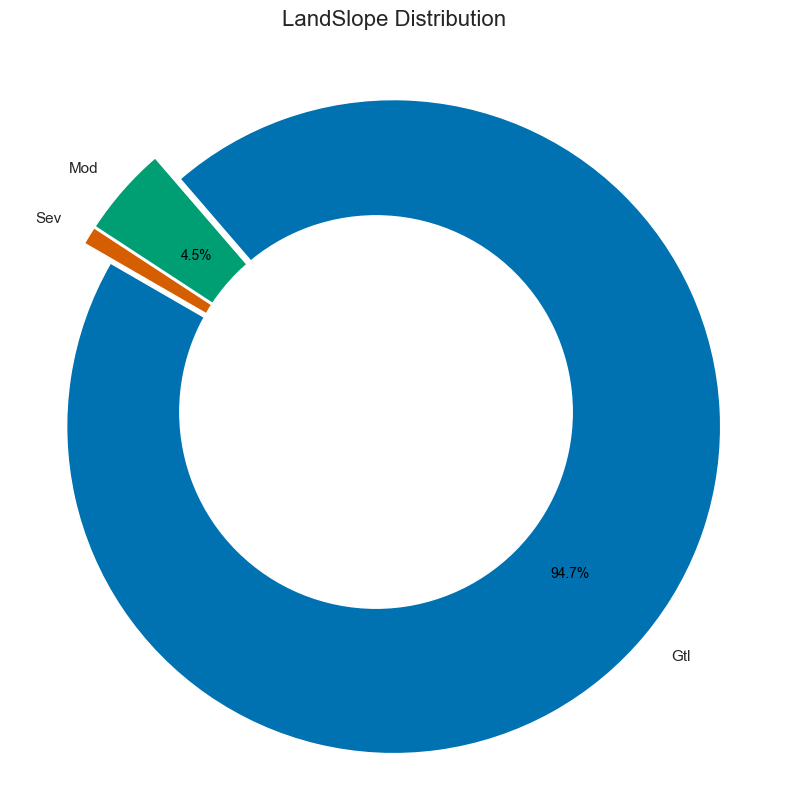

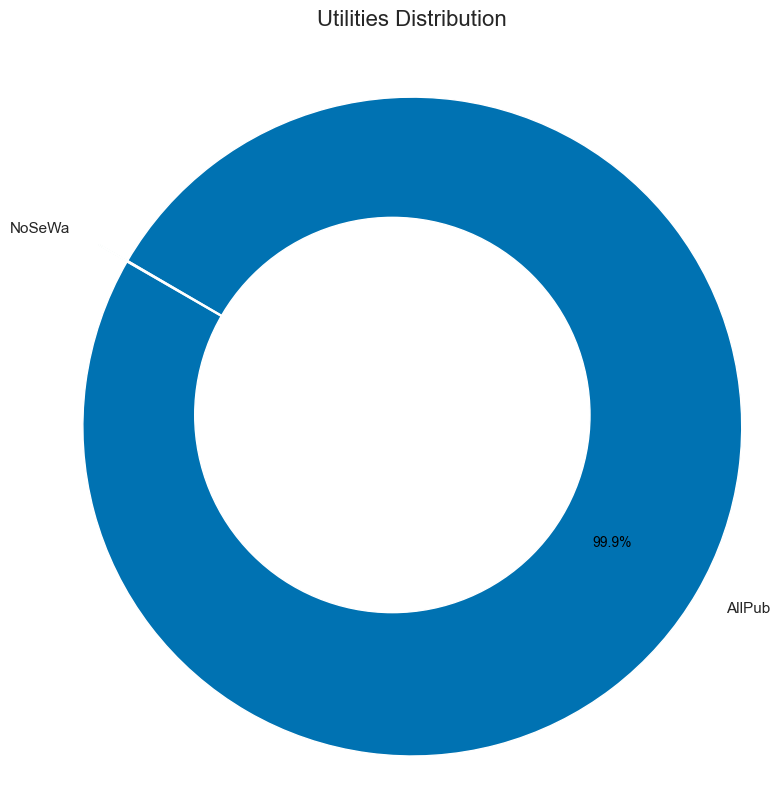

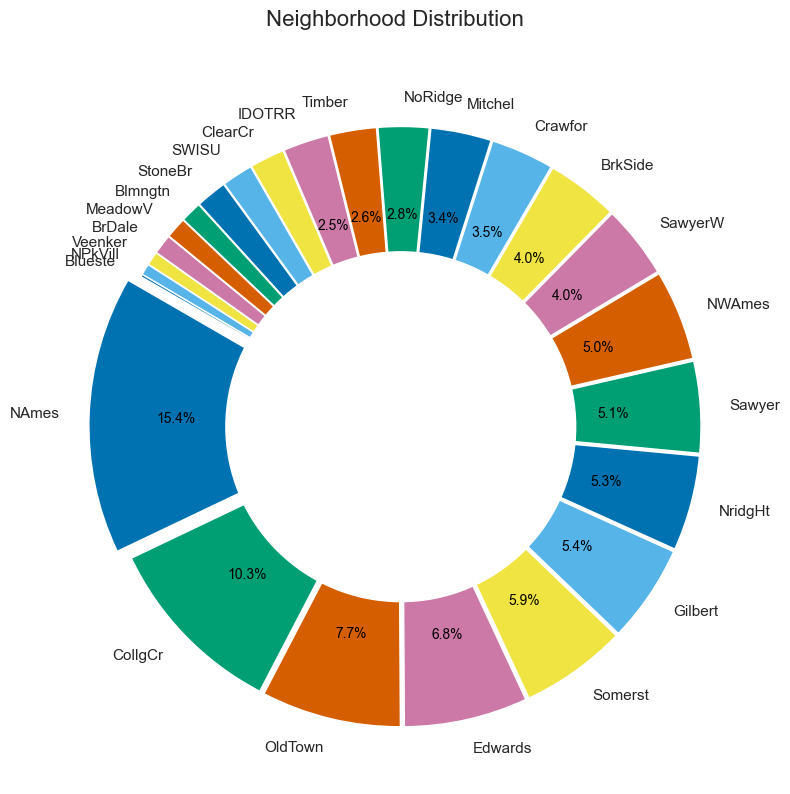

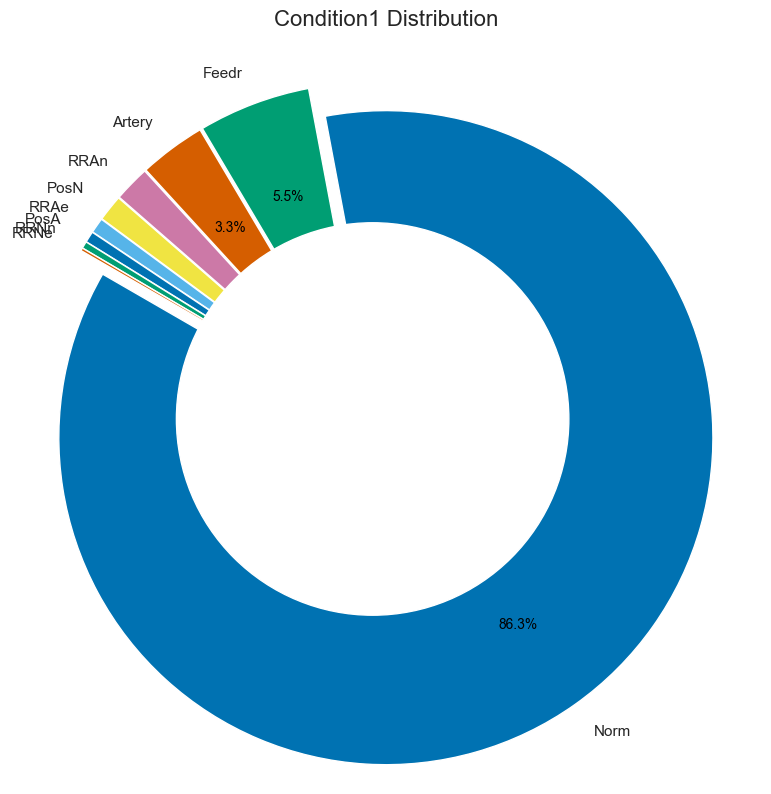

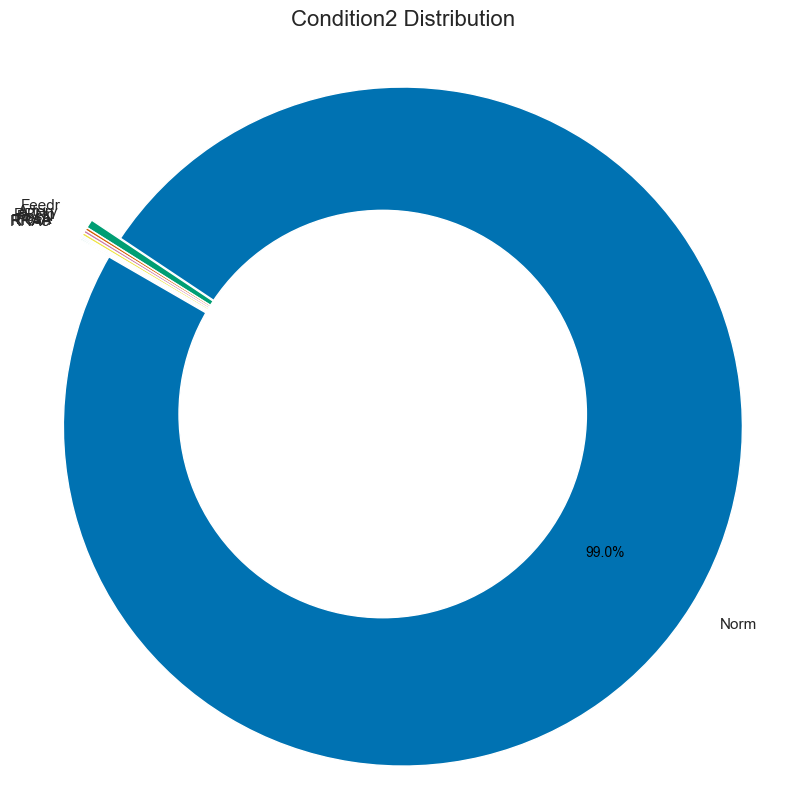

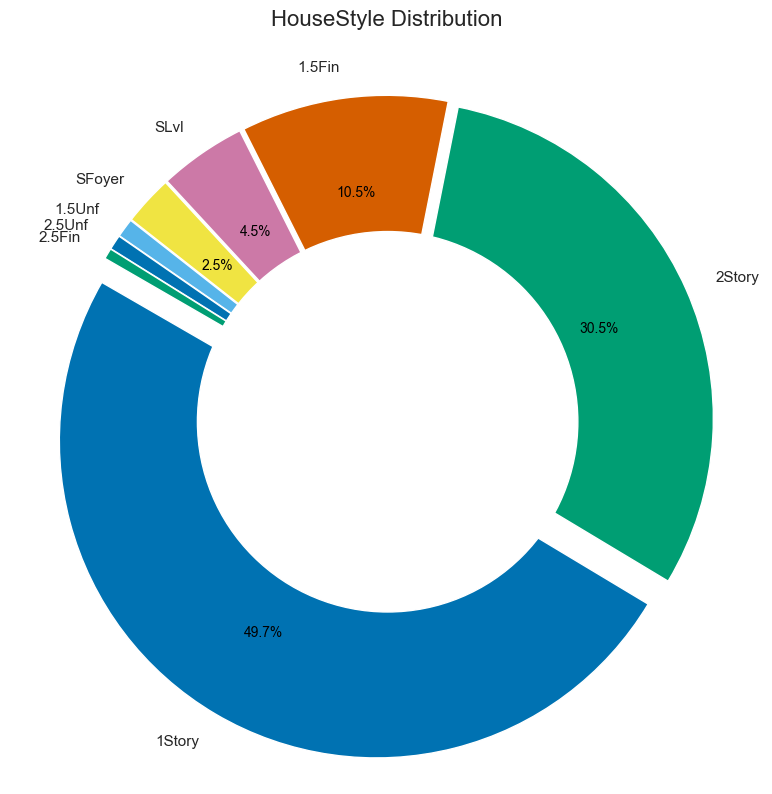

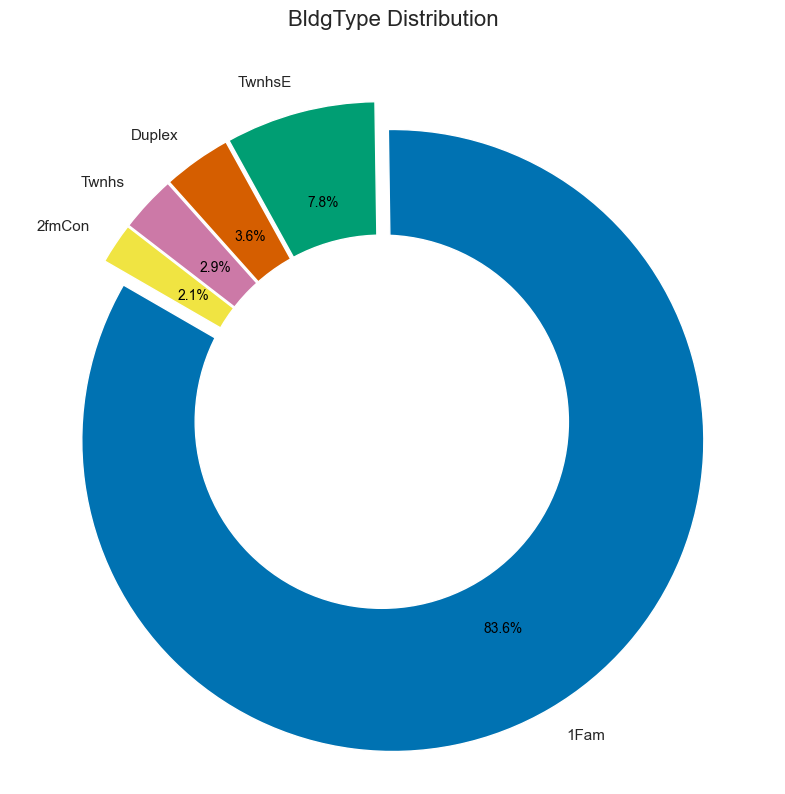

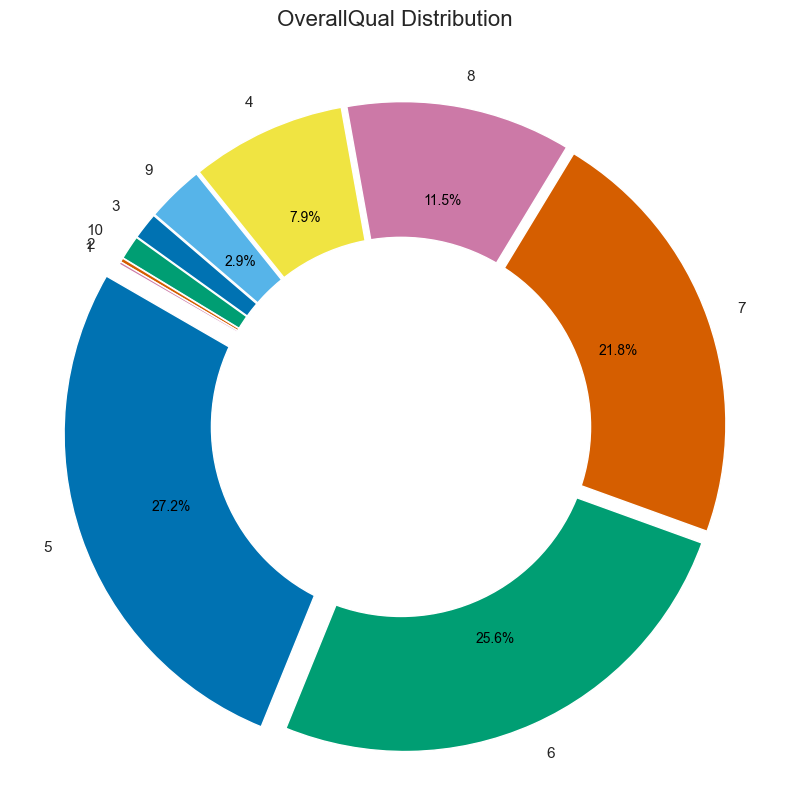

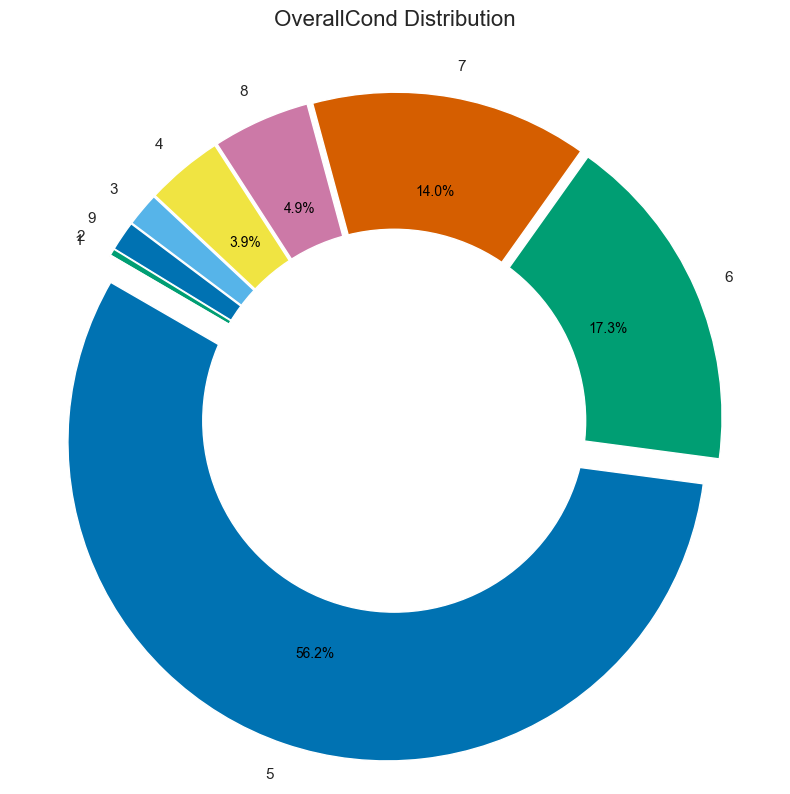

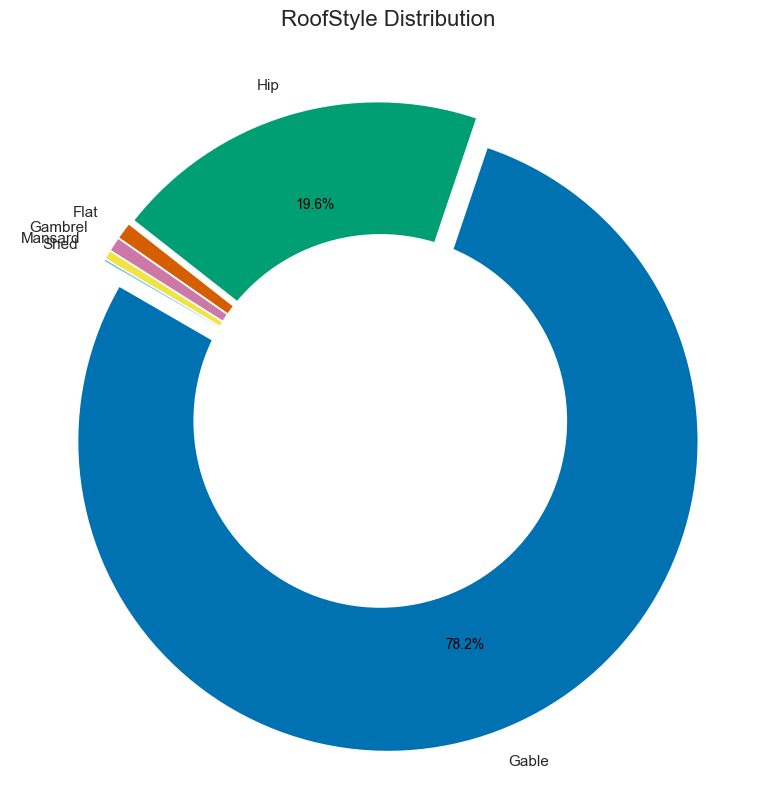

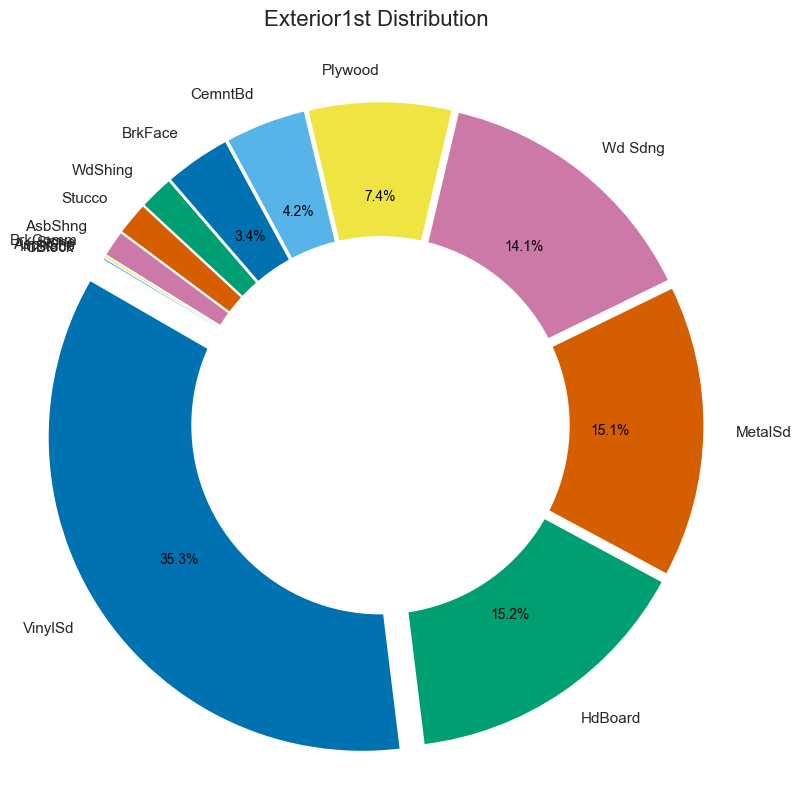

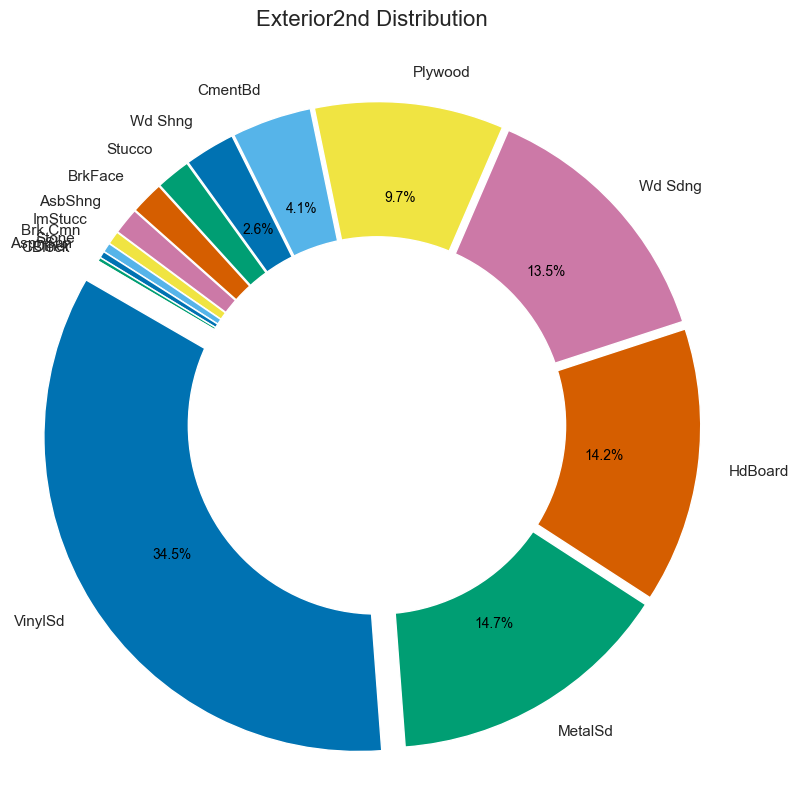

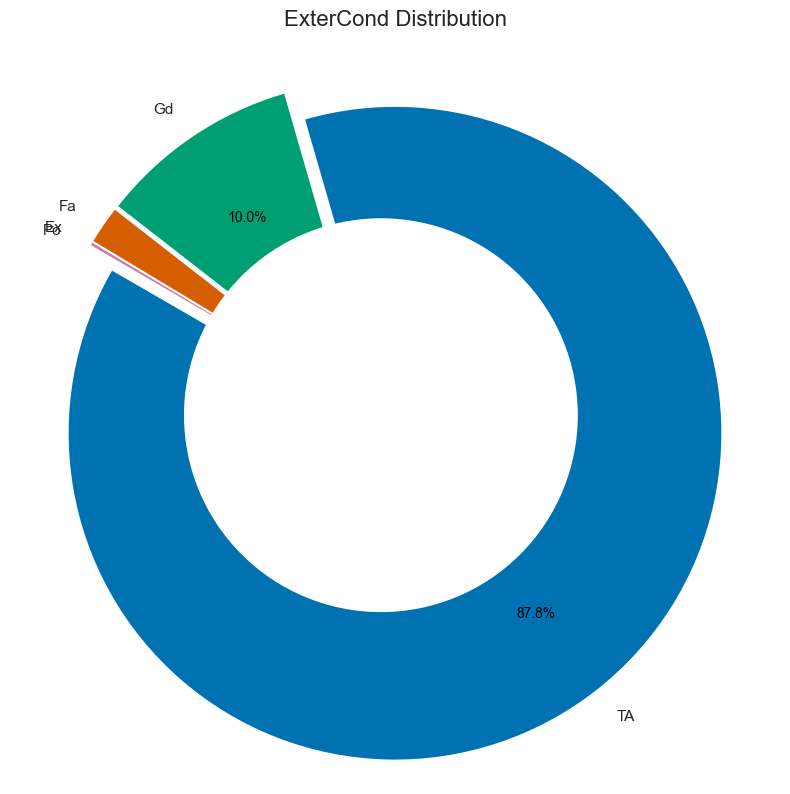

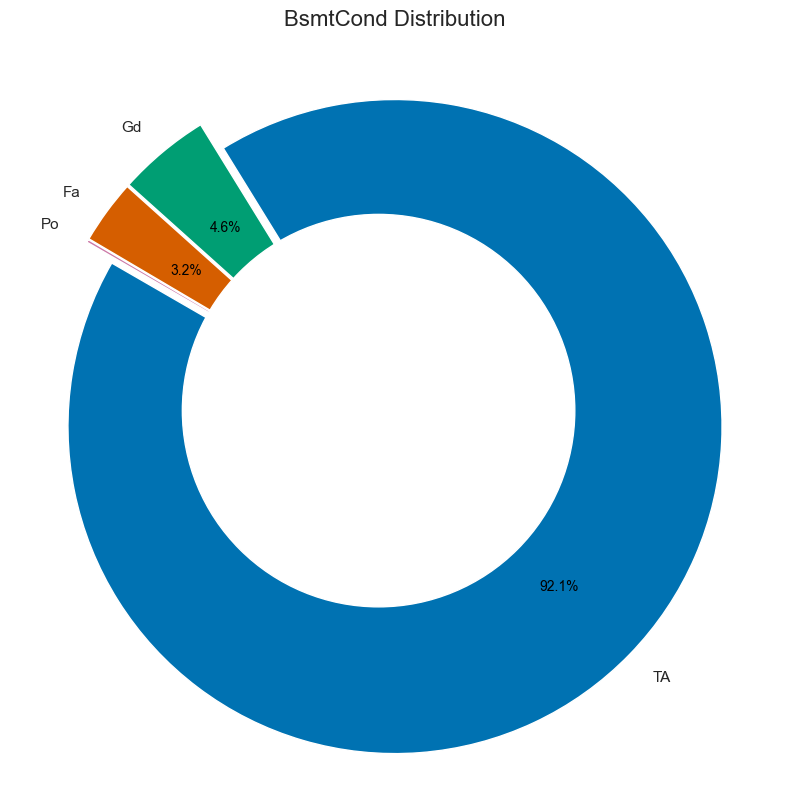

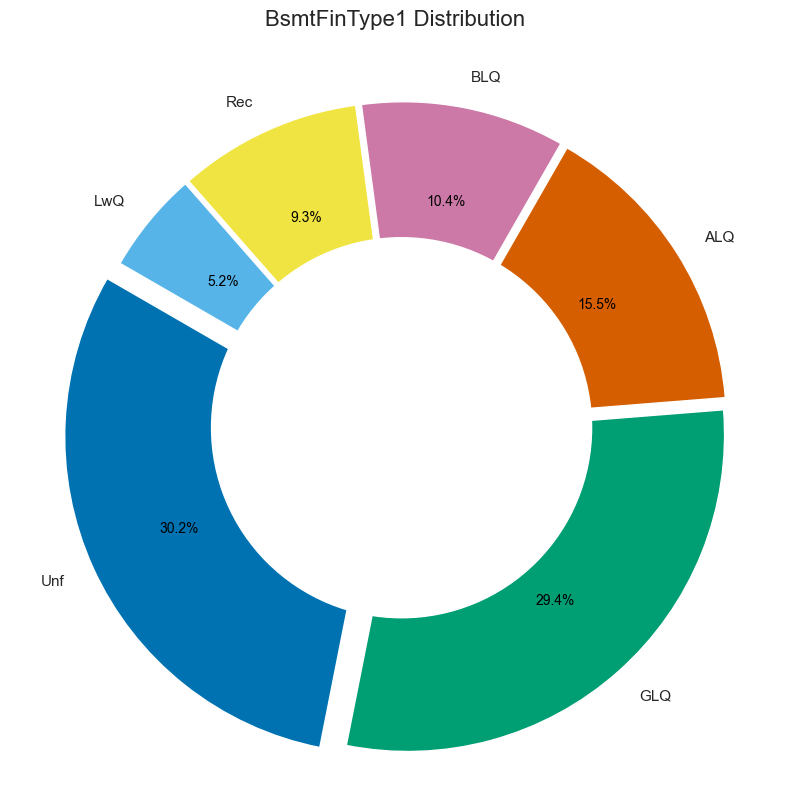

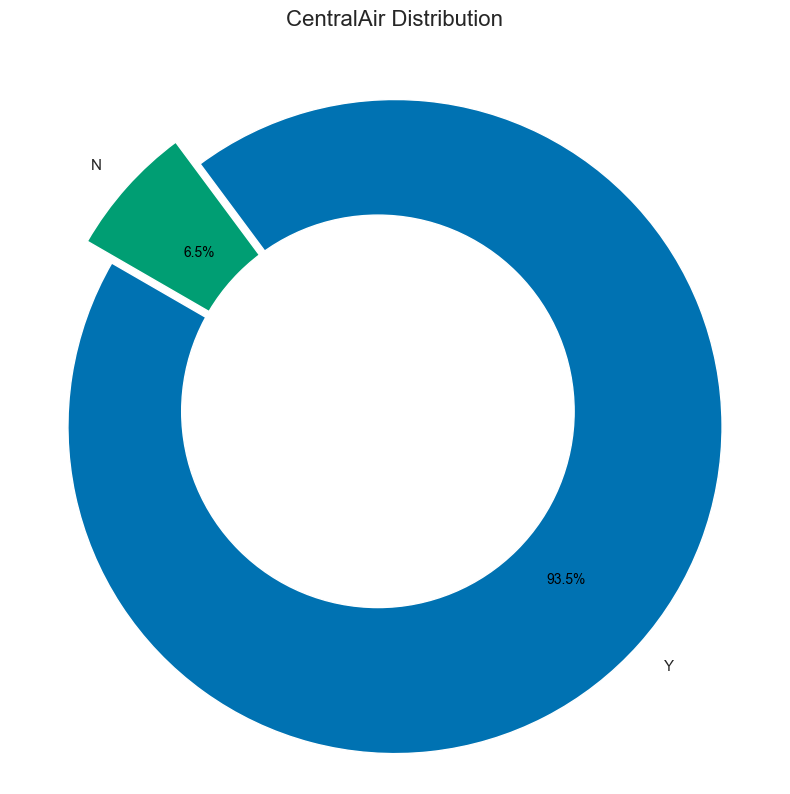

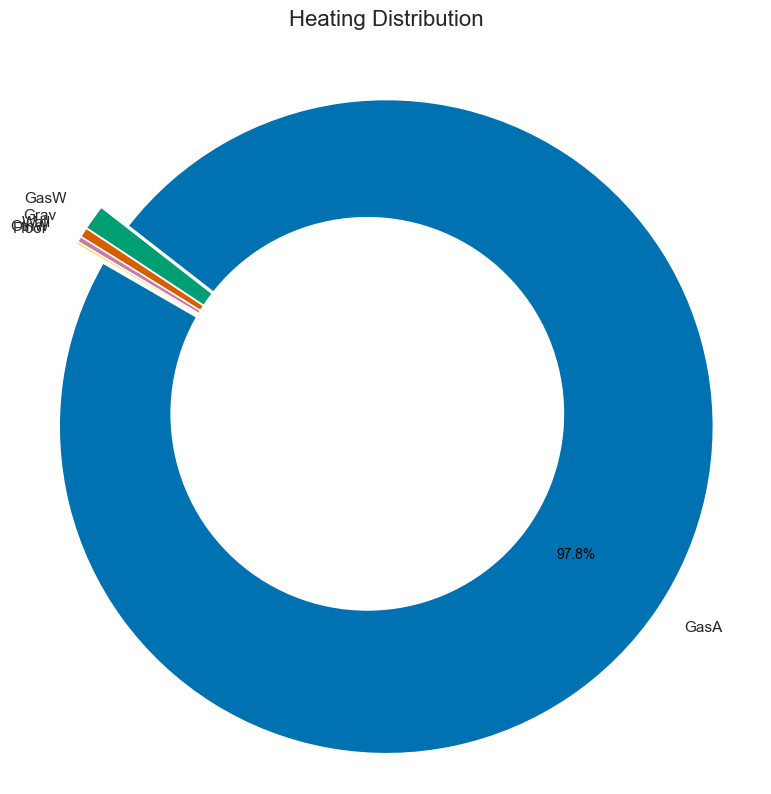

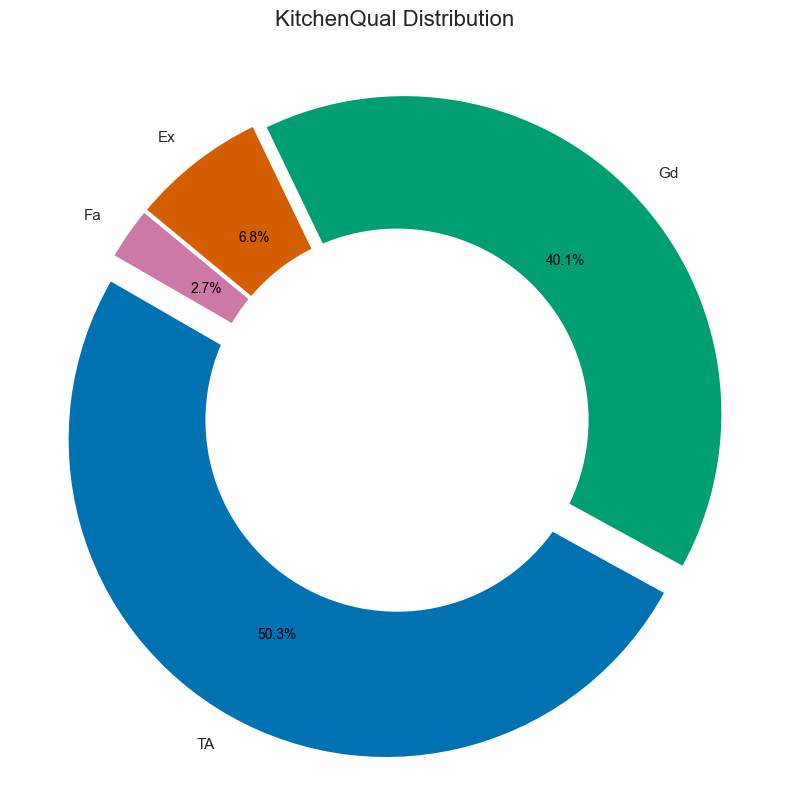

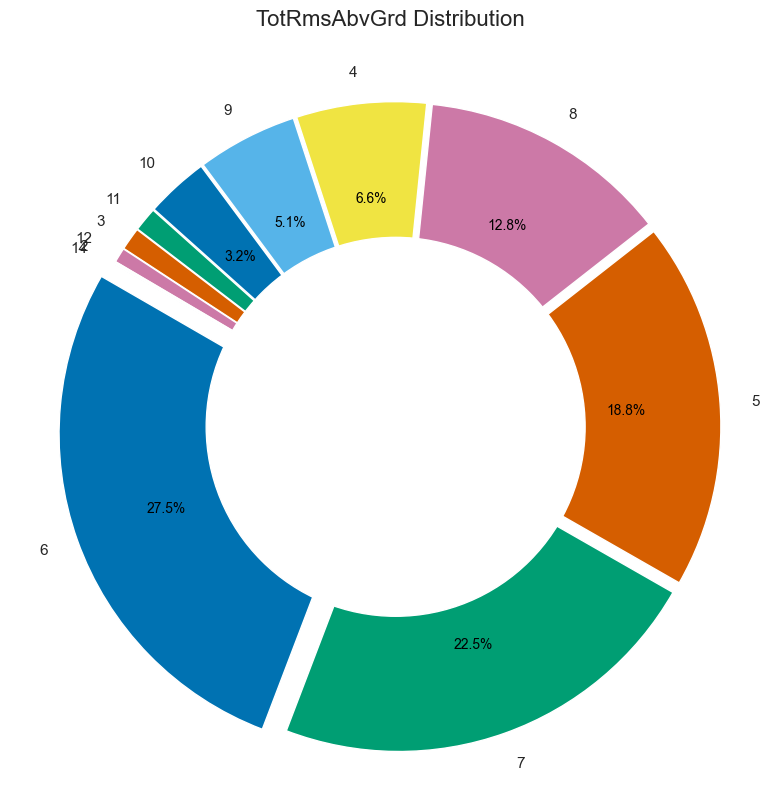

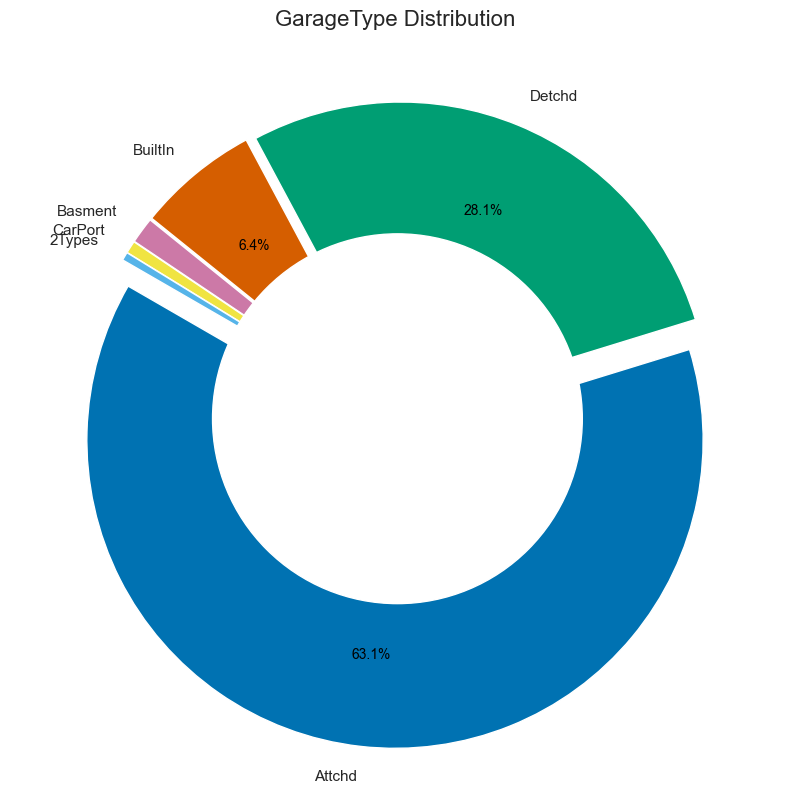

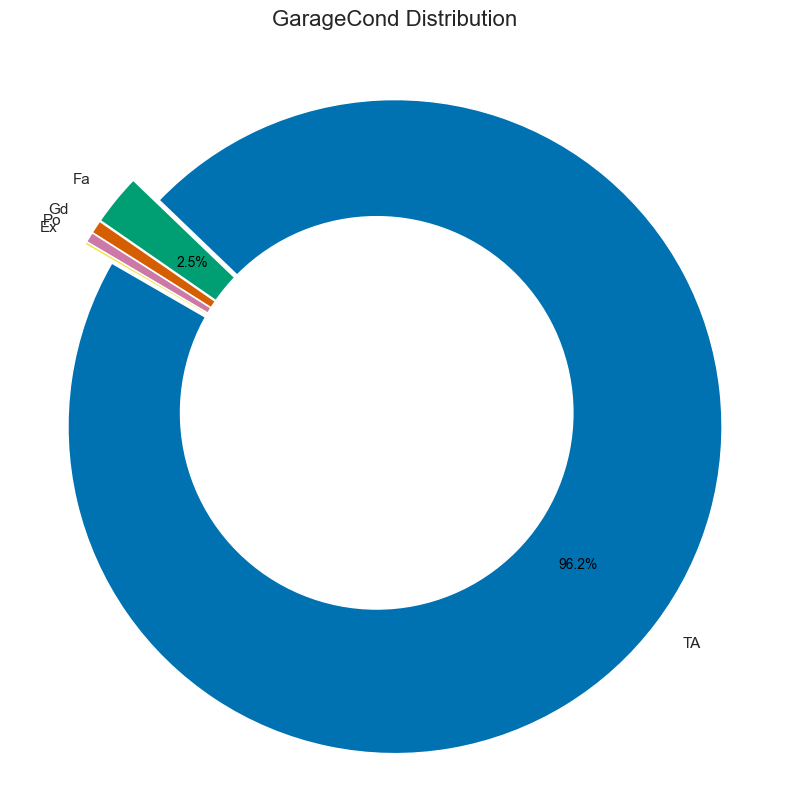

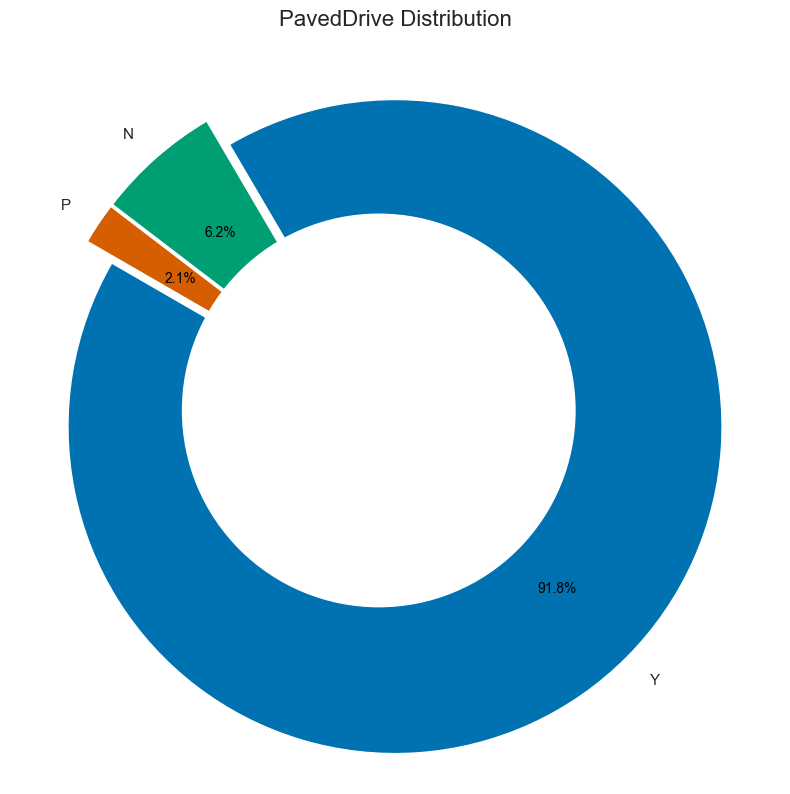

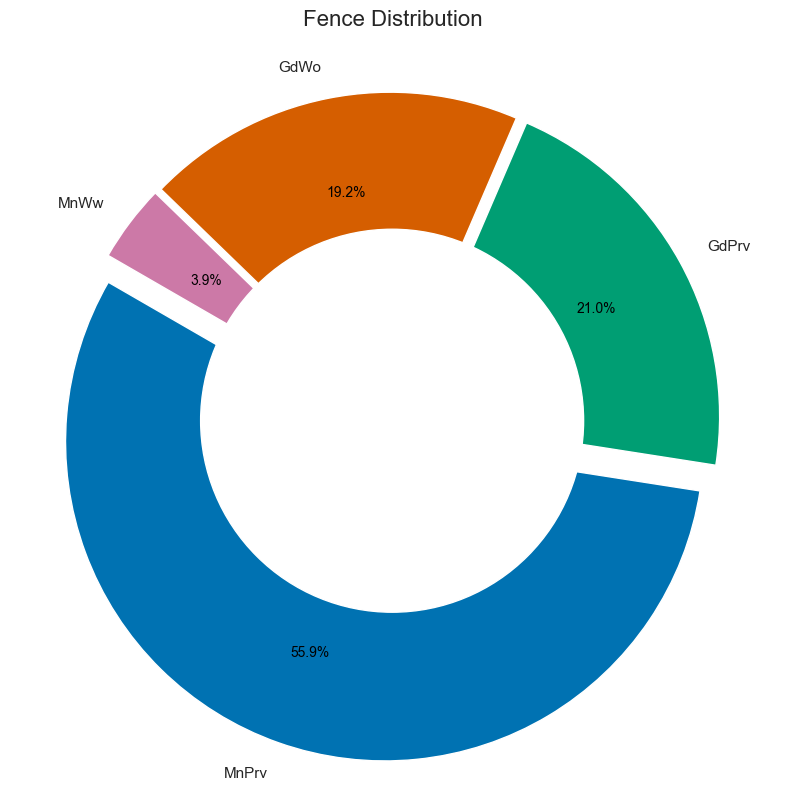

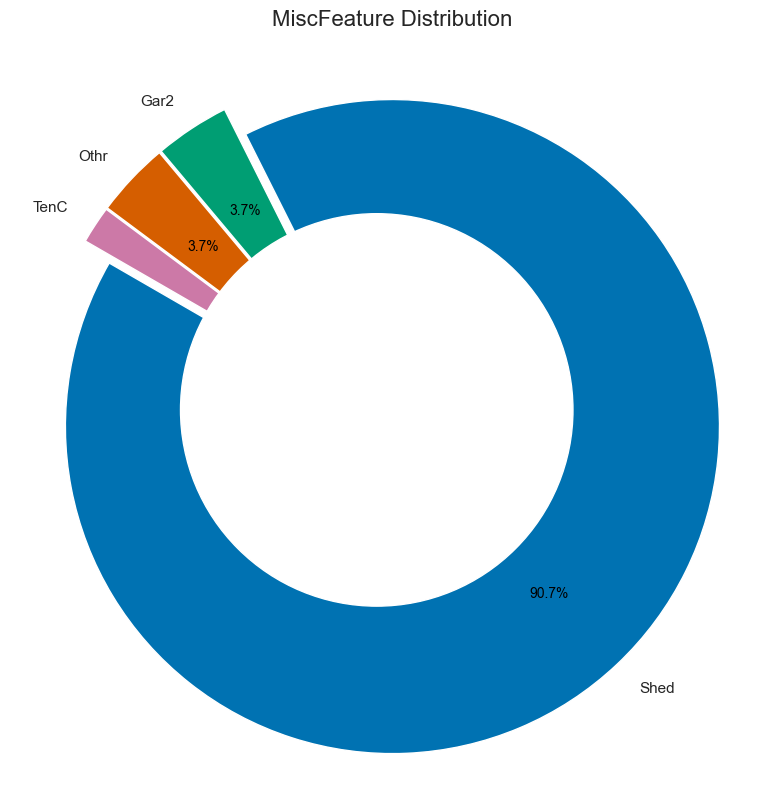

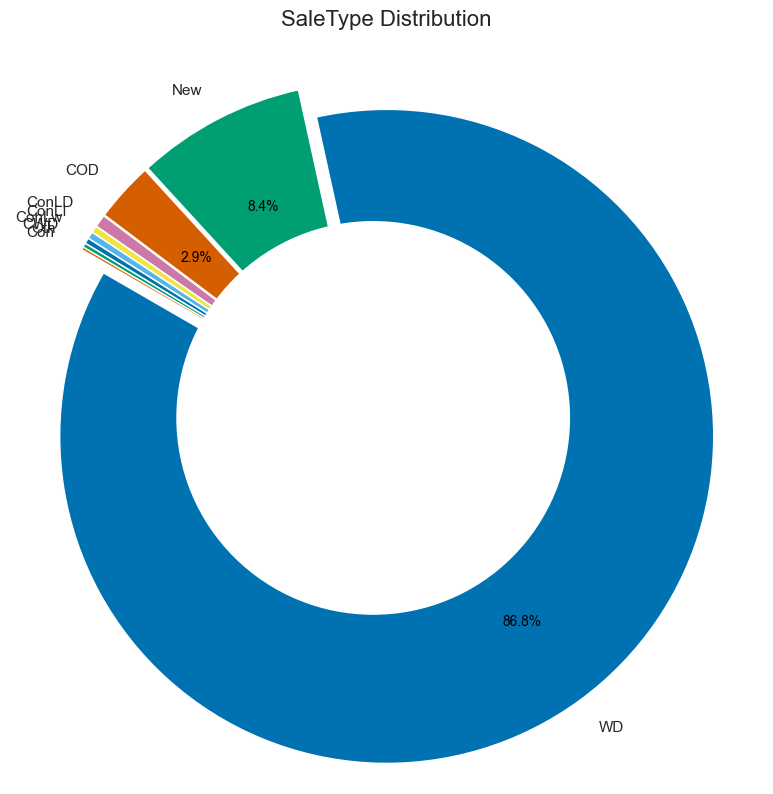

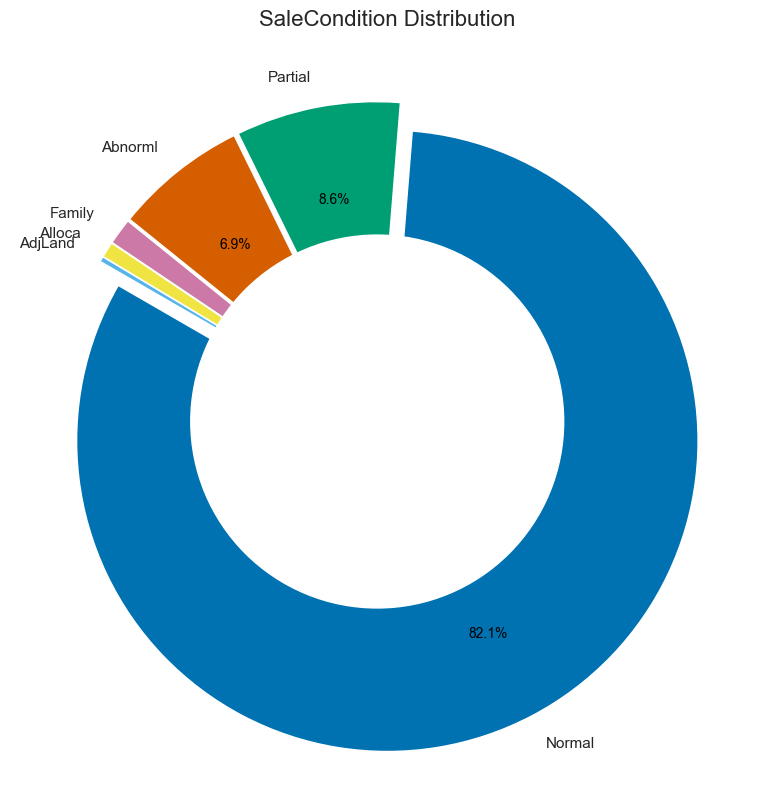

In [55]:
for col in categorical_columns:
    draw_pie_chart(train_set,col)

In [49]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


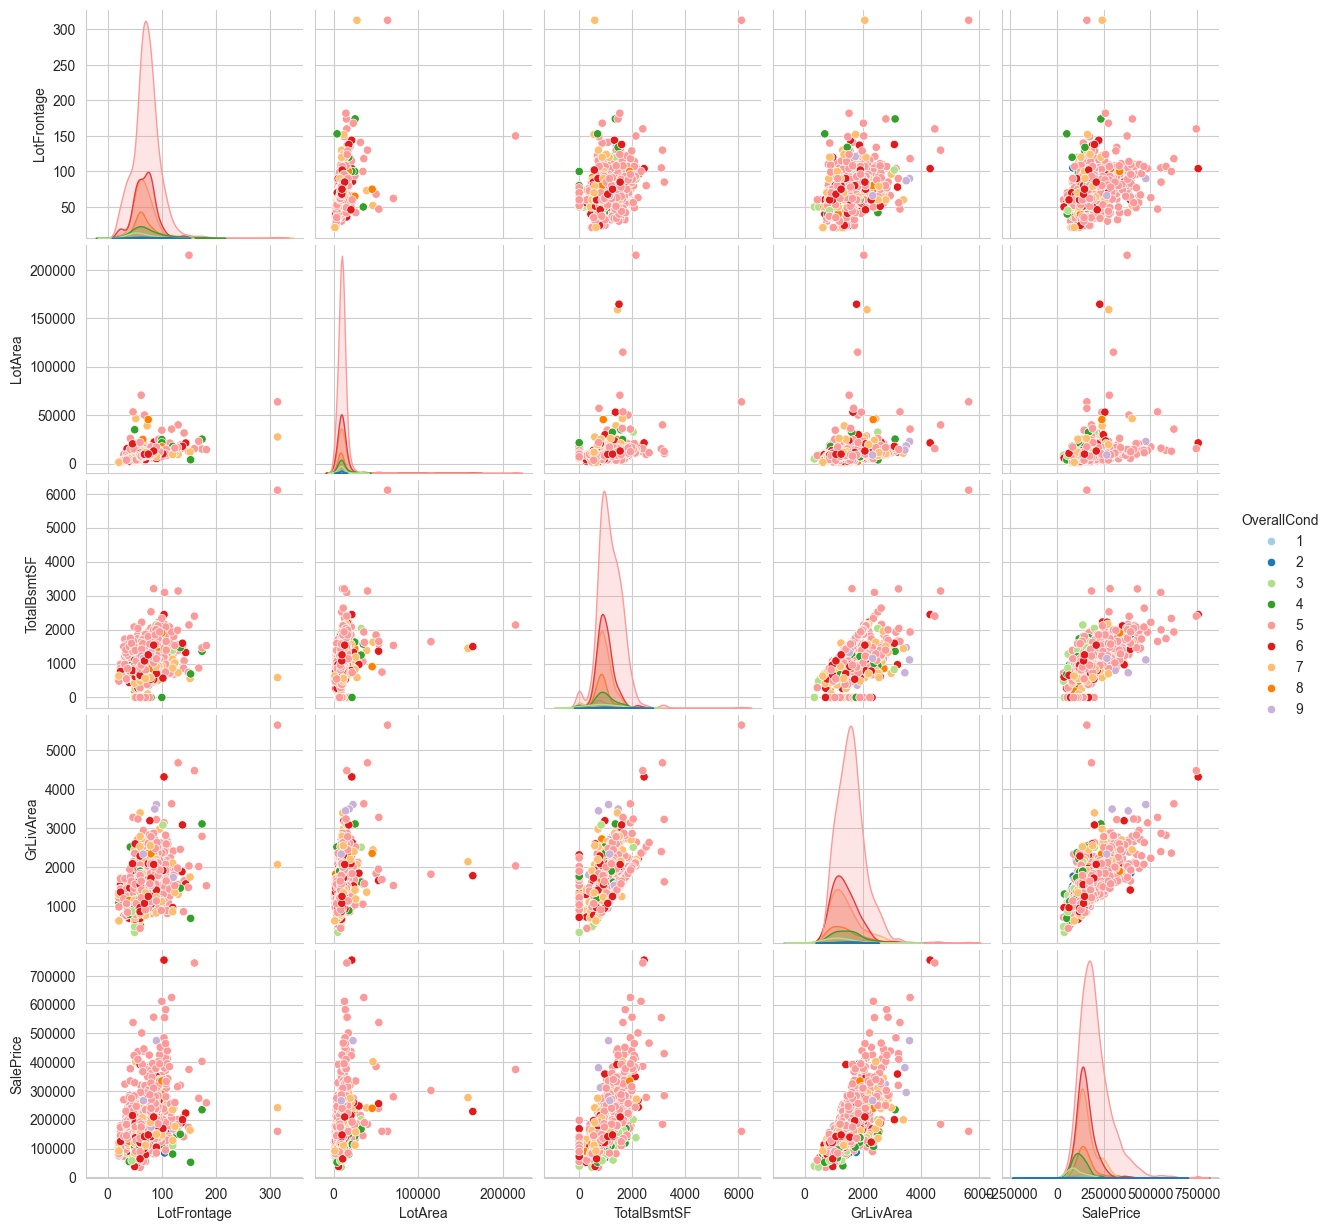

In [71]:
sns.pairplot(train_set[selected_num_columns+['OverallCond']],hue='OverallCond',palette='Paired')
#plt.title('Precio de los apartamentos según la condición del inmueble')

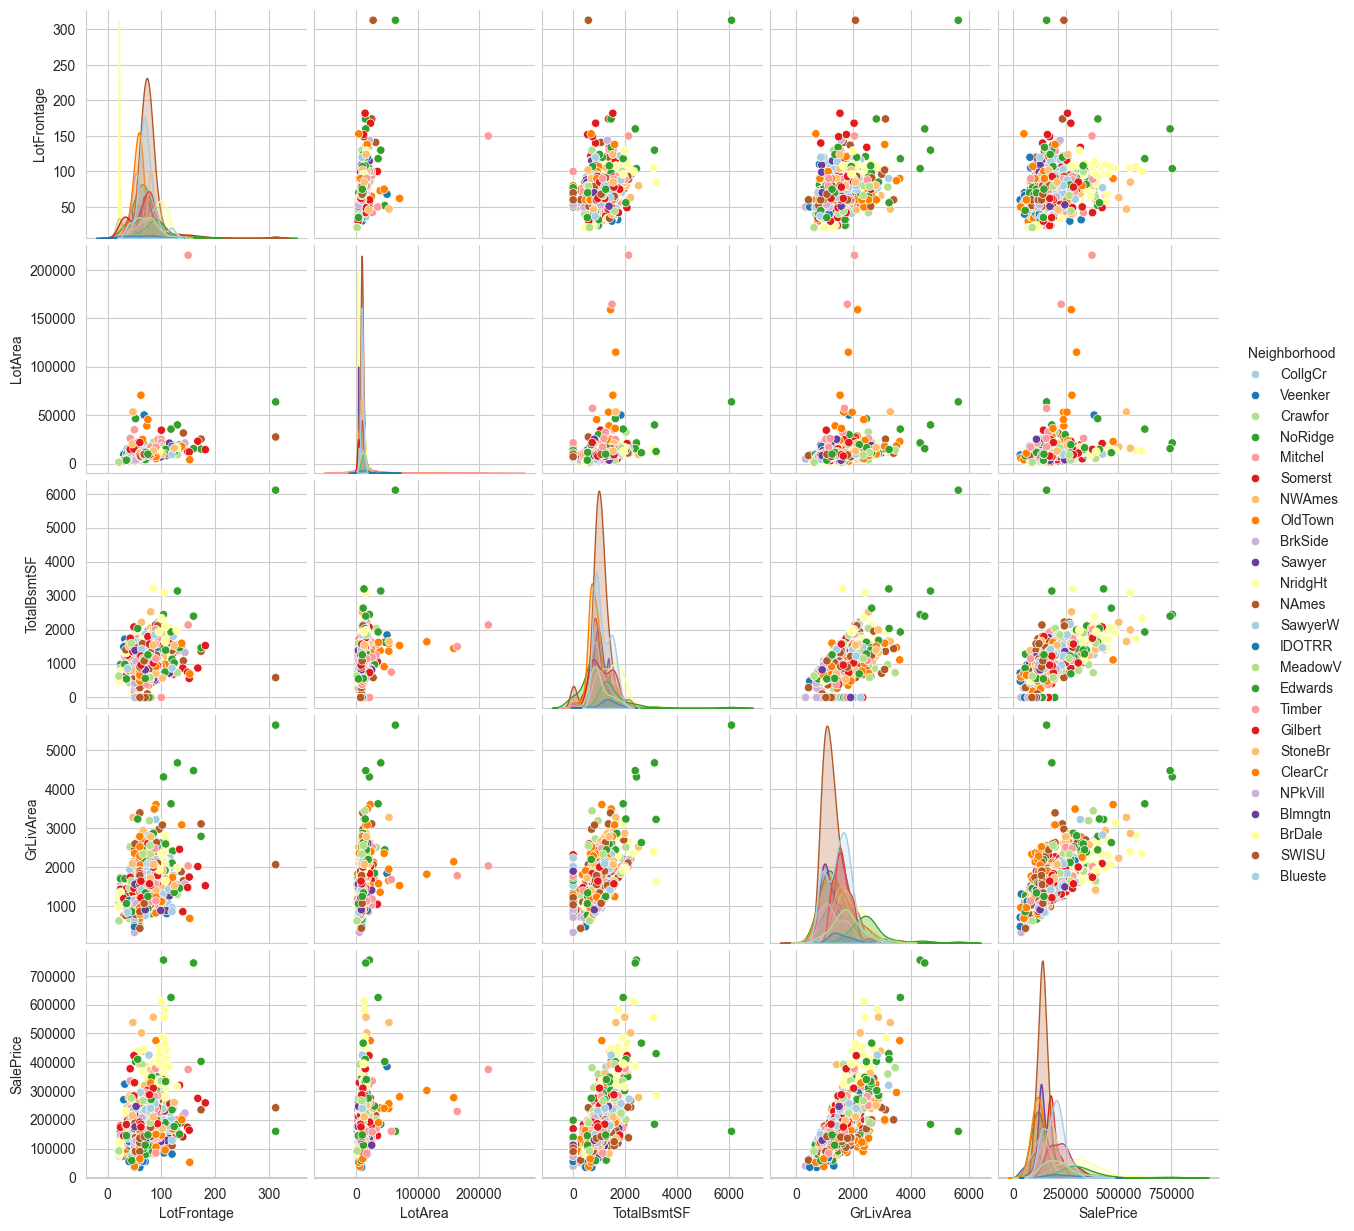

In [70]:
sns.pairplot(train_set[selected_num_columns+['Neighborhood']],hue='Neighborhood',palette='Paired')
#plt.title('Distribución de variables numéricas dado el barrio')

In [74]:
train_set.YrSold.value_counts()

YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64